# 656nm Graphs and Peak Difference

In [46]:
# Imports
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import peakutils

In [8]:
def savitzky_golay(y, window_size, order, deriv=0, rate=1):

    import numpy as np
    from math import factorial

    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError, msg:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

In [9]:
df656 = pd.read_csv('HD_5Angstroms_656nm.csv')
df656 = df656.reset_index(drop = True)
df656.columns = ['ds', 'nA']

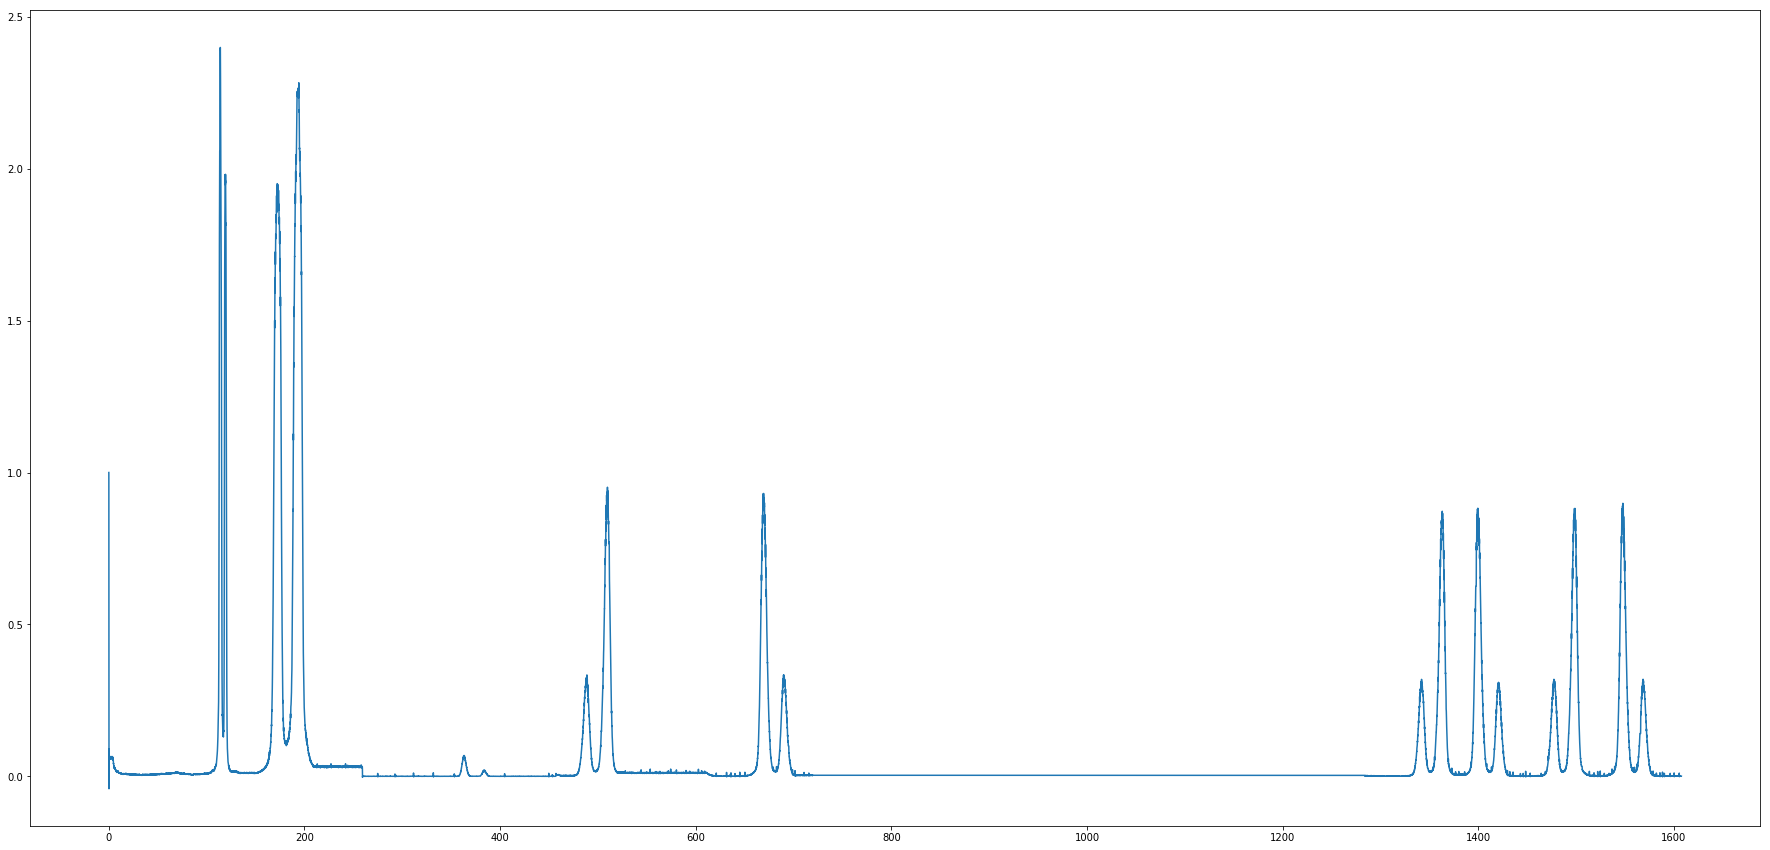

In [30]:
plt.figure(figsize=(31,15), facecolor='w')
plt.plot(df656.ds, df656.nA)
plt.show()

## first peaks


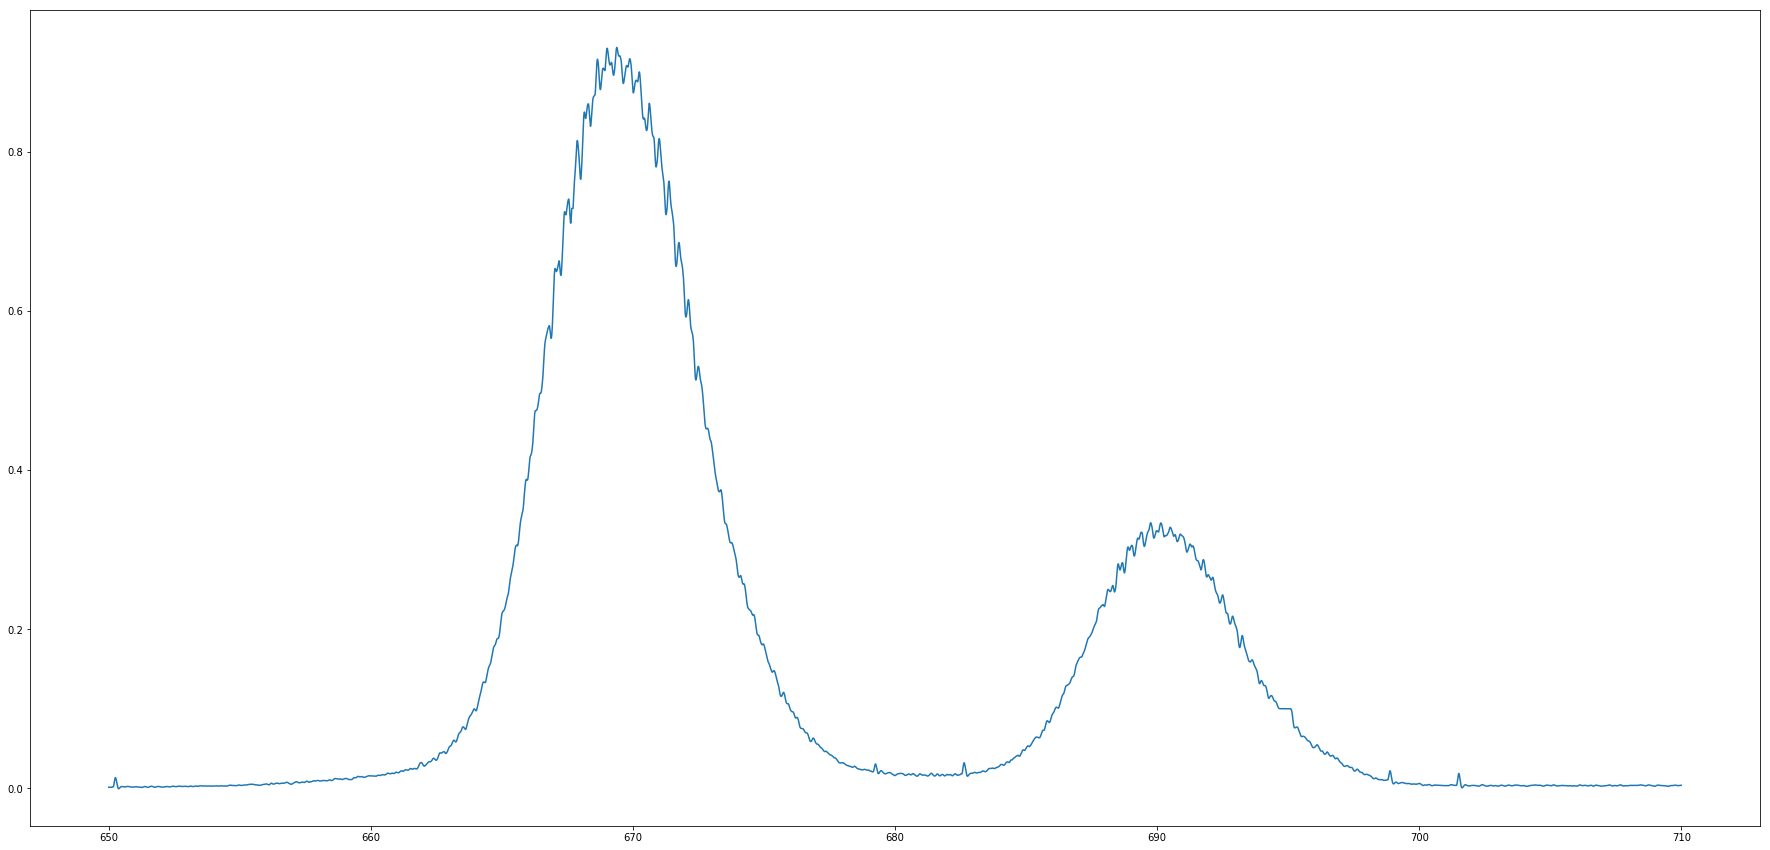

In [28]:
df656a=df656[(df656.ds < 710)&(df656.ds >650)].reset_index(drop=True)
plt.figure(figsize=(31,15), facecolor='w')
plt.plot(df656a.ds, df656a.nA)
plt.show()

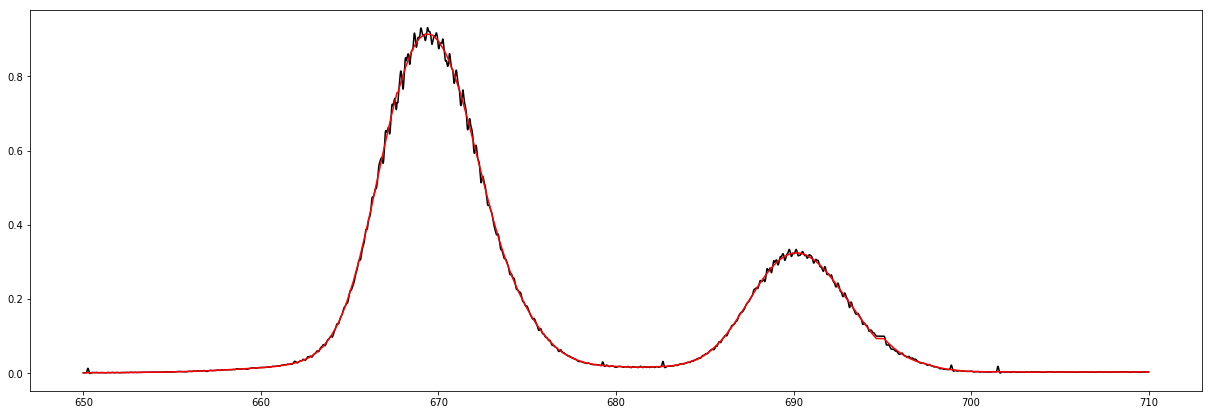

In [73]:
yhata=savitzky_golay(np.asarray(df656a.nA),20001,3) #window size 11, polynomial order 3
yhata.shape
x656a=np.asarray(df656a.ds)
plt.figure(figsize=(21,7), facecolor='w')
plt.plot(x656a, df656a.nA, 'k-')
plt.plot(x656a, yhata, 'r-')
plt.show()

## second peaks

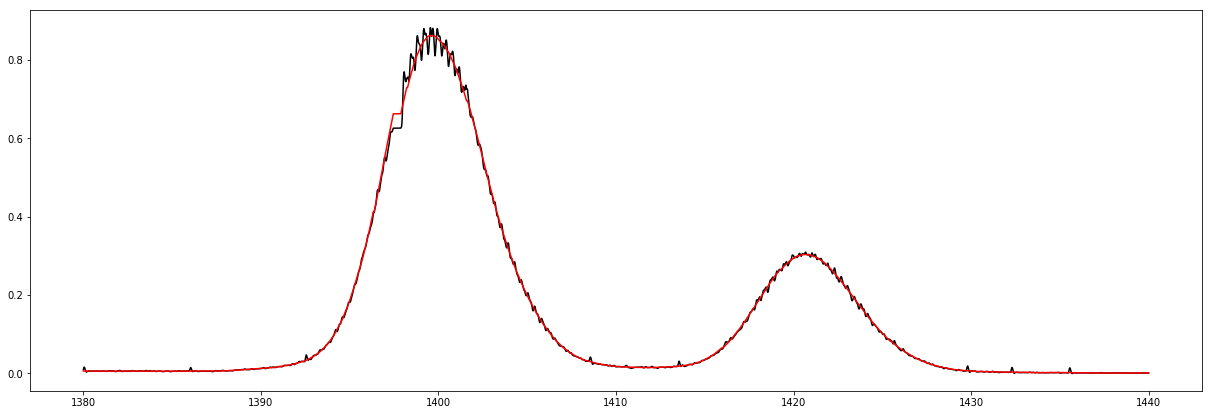

In [83]:
df656b=df656[(df656.ds < 1440)&(df656.ds >1380)].reset_index(drop=True)
#plt.figure(figsize=(31,15), facecolor='w')
#plt.plot(df656a.ds, df656a.nA)
#plt.show()
yhatb=savitzky_golay(np.asarray(df656b.nA),20001,3) 
yhatb.shape
x656b=np.asarray(df656b.ds)
plt.figure(figsize=(21,7), facecolor='w')
plt.plot(x656b, df656b.nA, 'k-')
plt.plot(x656b, yhatb, 'r-')
plt.show()

## Third Peaks

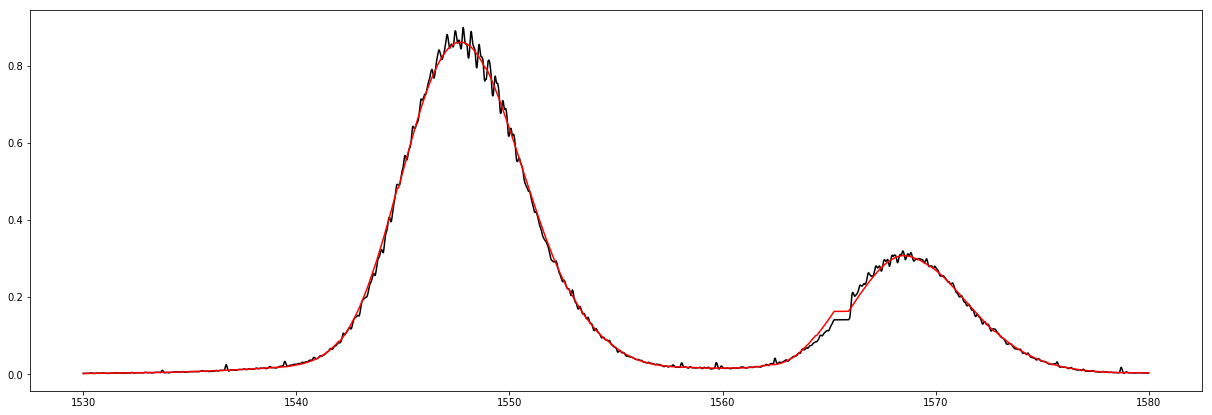

In [88]:
df656c=df656[(df656.ds < 1580)&(df656.ds >1530)].reset_index(drop=True)
#plt.figure(figsize=(31,15), facecolor='w')
#plt.plot(df656a.ds, df656a.nA)
#plt.show()
yhatc=savitzky_golay(np.asarray(df656c.nA),30001,3) 
yhatc.shape
x656c=np.asarray(df656c.ds)
plt.figure(figsize=(21,7), facecolor='w')
plt.plot(x656c, df656c.nA, 'k-')
plt.plot(x656c, yhatc, 'r-')
plt.show()

# Shift Values

#### First Peaks

[ 93322 196363]
(array([ 669.307984,  690.196032]), array([ 0.91423395,  0.3243316 ]))


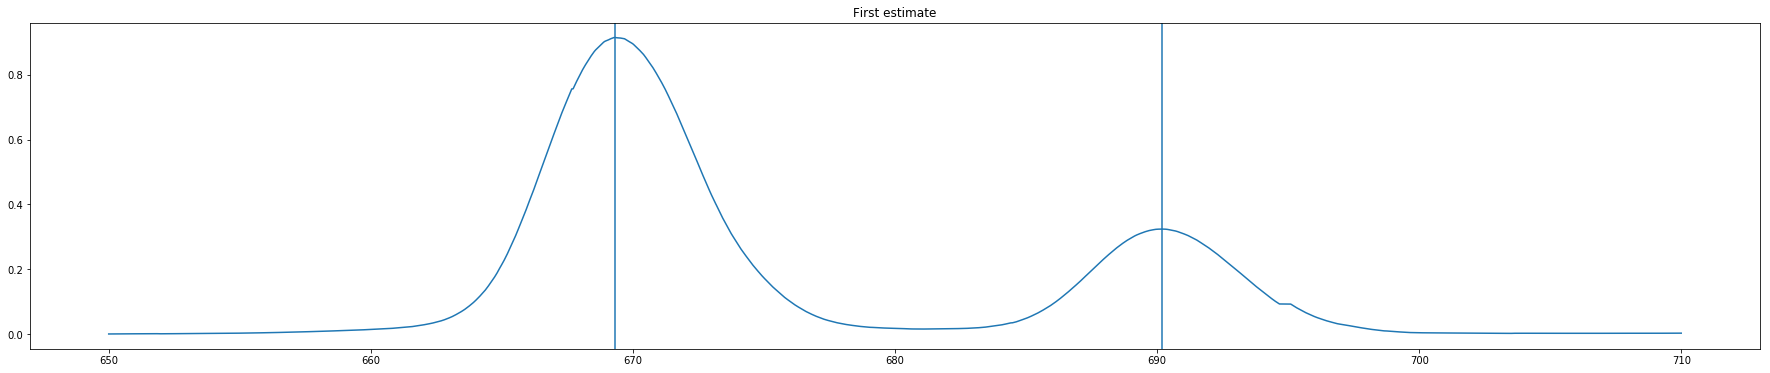

In [70]:
indexes = peakutils.indexes(yhata, thres=0.3, min_dist=500)
print(indexes)
print(x656a[indexes], yhata[indexes])
plt.figure(figsize=(31,6))
plt.plot(x656a, yhata)
plt.axvline(x656a[indexes][0])
plt.axvline(x656a[indexes][1])
plt.title('First estimate')
plt.show()

#### Second Peaks

[ 93955 197351]
(array([ 1399.535344,  1420.595944]), array([ 0.86210929,  0.30382095]))


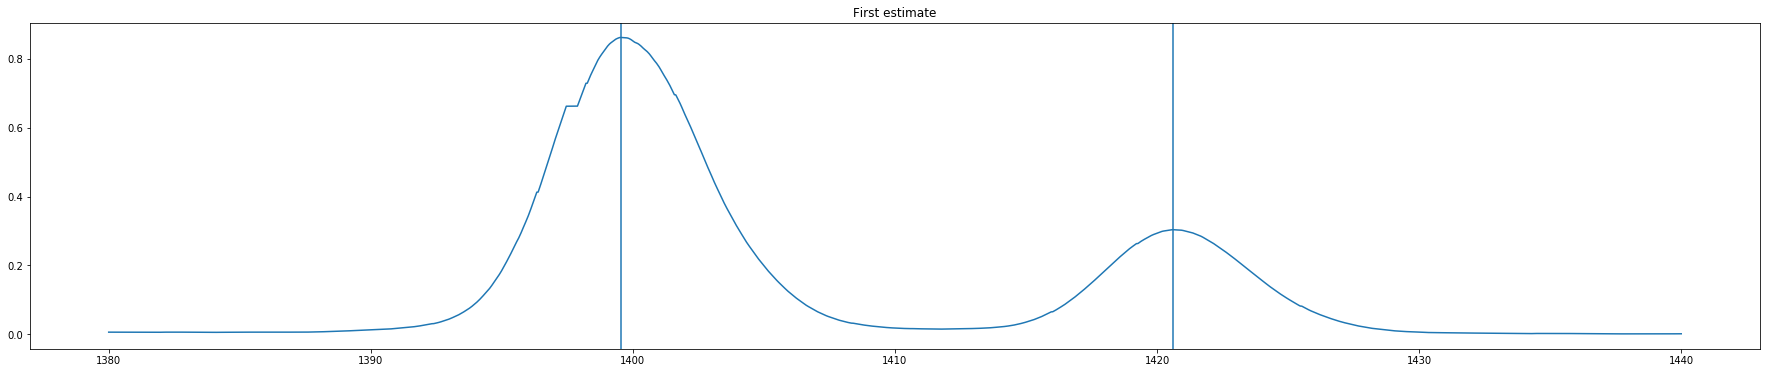

In [84]:
indexes = peakutils.indexes(yhatb, thres=0.2, min_dist=500)
print(indexes)
print(x656b[indexes], yhatb[indexes])
plt.figure(figsize=(31,6))
plt.plot(x656b, yhatb)
plt.axvline(x656b[indexes][0])
plt.axvline(x656b[indexes][1])
plt.title('First estimate')
plt.show()

#### Third Peaks

[ 86763 185041]
(array([ 1547.710576,  1568.512096]), array([ 0.86054257,  0.30742081]))


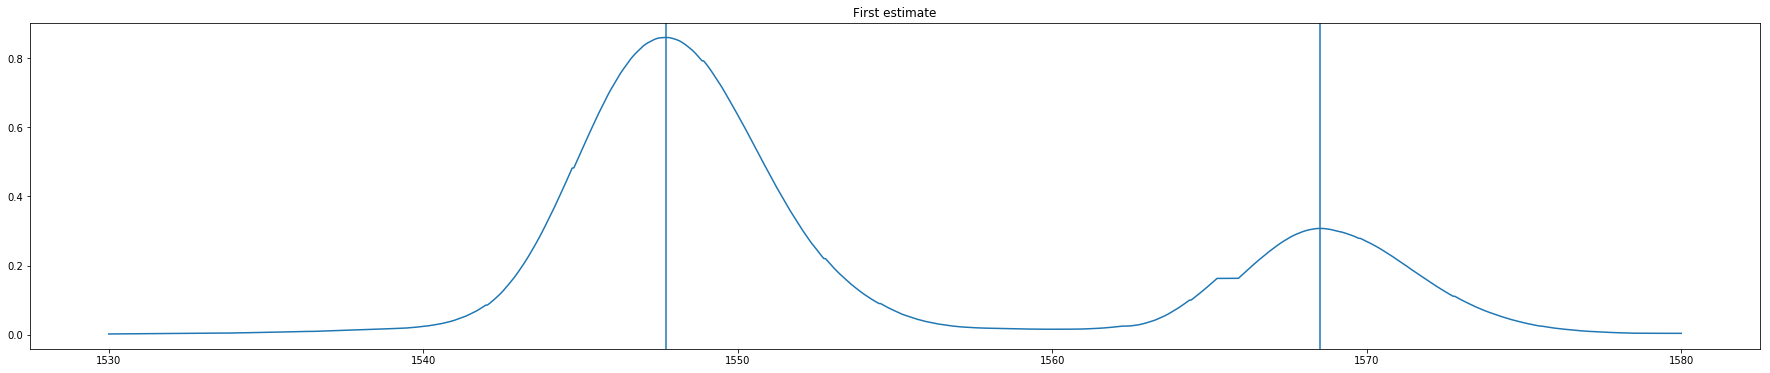

In [92]:
indexes = peakutils.indexes(yhatc, thres=0.1, min_dist=500)
print(indexes)
print(x656c[indexes], yhatc[indexes])
plt.figure(figsize=(31,6))
plt.plot(x656c, yhatc)
plt.axvline(x656c[indexes][0])
plt.axvline(x656c[indexes][1])
plt.title('First estimate')
plt.show()

## 656nm Peak Shift Values

In [93]:
deltaA = (x656a[indexes][1] - x656a[indexes][0])
print ((deltaA/12)*10**-10)
deltaB = (x656b[indexes][1] - x656b[indexes][0])
print ((deltaB/12)*10**-10)
deltaC = (x656c[indexes][1] - x656c[indexes][0])
print ((deltaC/12)*10**-10)

1.66072733333e-10
1.66916266667e-10
1.73346e-10


In [94]:
## balmer calculates difference between the expected values of frequency peaks
# 3->2 transition correlates to 656nm light
import balmer as B
B.HDBalmer(3,2)

(6.561123701785993e-07, 6.562910472511739e-07, -1.786770725745877e-10)

The data determined values seem to equate closly to the calculated values. Also adjust data to the known frequency difference equation.